# #MapLesotho Buildings Density

The Objective her is to do some explorartory analysis on the building desnsity tiles. 

So the first we are going to do is import some modules into python to help do this quickly. These are pandas as numpy.

In [60]:
import pandas as pd
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


We have saved a csv file from the database called `bg_count_dec.csv`. We load this into pandas.

You can see there are only two columns 

- `gid_pk` - the grid square number
- `total` - the count of buildings within each square

In [61]:
buildings = pd.read_csv('bd_count_dec.csv')
buildings.columns

Index(['gid_pk', 'total'], dtype='object')

In [62]:
buildings.head()

,gid_pk,total
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0




A quick summary statistic for the total column. We can see that the majority of tiles have no buildings. So we will ignore all the ones with no buildings for now. 

This is caused by the grid extending well boyond the boundary of Lesotho. (ADD IMAGE)



In [63]:
buildings['total'].describe()

count    294300.000000
mean          1.594006
std          11.565101
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         517.000000
Name: total, dtype: float64

In [64]:
buildings.total.sum()

469116

In [6]:
bds = buildings[buildings.total > 0]
bds['total'].describe()

count    16222.000000
mean        28.918506
std         40.452856
min          1.000000
25%          4.000000
50%         14.000000
75%         36.000000
max        517.000000
Name: total, dtype: float64

In [7]:
dist = pd.DataFrame(bds)
dist.reset_index(inplace=True)

**Lets have a look at the distribution. We know there will be a long tail since the 75th percentile is only 36 while the mas count is 517.**

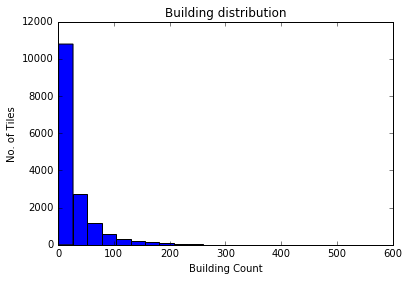

In [8]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(dist.total, bins = 20)

#Labels and Tit
plt.title('Building distribution')
plt.xlabel('Building Count')
plt.ylabel('No. of Tiles')
plt.show()


In [14]:
dist['total'].quantile([0.9, 0.95, 0.96, 0.97, 0.98, 0.99])

0.90     75.00
0.95    110.00
0.96    124.16
0.97    142.00
0.98    164.58
0.99    197.00
Name: total, dtype: float64

In [8]:
from IPython.display import HTML
import colorlover as cl

In [59]:
bupu = cl.scales['9']['seq']['RdPu']
HTML( cl.to_html( bupu ) )
bupu

['rgb(255,247,243)',
 'rgb(253,224,221)',
 'rgb(252,197,192)',
 'rgb(250,159,181)',
 'rgb(247,104,161)',
 'rgb(221,52,151)',
 'rgb(174,1,126)',
 'rgb(122,1,119)',
 'rgb(73,0,106)']